In [327]:
import requests
import json
import numpy as np
import pandas as pd
from pprint import pprint
from datetime import date
from pandas import DataFrame

<h1> First let us access S&P 500 ETF (SPY) data from Yahoo Finance</h1>

In [328]:
url = 'https://finance.yahoo.com/quote/SPY/history/'

In [329]:
df = pd.read_html(url)

In [330]:
spy_df = df[0]

<h3> Lets check out this data and see what the types are and what needs to be cleaned<h3>

In [331]:
spy_df.head(40)

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"May 18, 2020",293.05,296.75,292.70,295.00,295.00,119703800
1,"May 15, 2020",282.37,286.33,281.34,286.28,286.28,111146300
2,"May 14, 2020",278.95,285.11,272.99,284.97,284.97,121977900
3,"May 13, 2020",286.06,287.19,278.96,281.60,281.60,144721100
4,"May 12, 2020",293.79,294.24,286.52,286.67,286.67,95870800
5,"May 11, 2020",290.34,294.00,289.88,292.50,292.50,79030200
6,"May 08, 2020",291.09,292.95,289.86,292.44,292.44,76622100
7,"May 07, 2020",287.75,289.78,287.13,287.68,287.68,75250400
8,"May 06, 2020",288.04,288.46,283.78,284.25,284.25,73632600
9,"May 05, 2020",286.64,289.25,283.71,286.19,286.19,79569900


In [332]:
spy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 7 columns):
Date           101 non-null object
Open           101 non-null object
High           101 non-null object
Low            101 non-null object
Close*         101 non-null object
Adj Close**    101 non-null object
Volume         101 non-null object
dtypes: object(7)
memory usage: 5.6+ KB


<h3> Looks like we will need to clear the dividend row so that we can convert this data frame to float</h3>

In [333]:
div_index = spy_df[spy_df['Open']=='1.406 Dividend'].index #drop dividend so data can be converted 

In [334]:
spy_df.drop(div_index, inplace=True) #dividend row is now dropped

In [335]:
 spy_df.tail(5)

,Date,Open,High,Low,Close*,Adj Close**,Volume
96,"Dec 31, 2019",320.53,322.13,320.15,321.86,319.98,57077300
97,"Dec 30, 2019",322.95,323.10,320.55,321.08,319.20,49729100
98,"Dec 27, 2019",323.74,323.80,322.28,322.86,320.97,42528800
99,"Dec 26, 2019",321.65,322.95,321.64,322.94,321.05,30911200
100,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...,*Close price adjusted for splits.**Adjusted cl...


<h3> Looks like we need to drop the entire last row</h3>

In [336]:
spy_df.drop(spy_df.tail(1).index,inplace=True)

In [337]:
spy_df.tail(5)

,Date,Open,High,Low,Close*,Adj Close**,Volume
95,"Jan 02, 2020",323.54,324.89,322.53,324.87,322.97,59151200
96,"Dec 31, 2019",320.53,322.13,320.15,321.86,319.98,57077300
97,"Dec 30, 2019",322.95,323.10,320.55,321.08,319.20,49729100
98,"Dec 27, 2019",323.74,323.80,322.28,322.86,320.97,42528800
99,"Dec 26, 2019",321.65,322.95,321.64,322.94,321.05,30911200


<h2> Now everything that would stop us from converting the dataframe to the desired data types has been removed. <br><h3>Lets convert the "Date" and set it as the index</h3> </h2>

In [338]:
spy_df['Date']=pd.to_datetime(spy_df['Date'])

In [339]:
spy_df=spy_df.set_index(['Date'])

In [340]:
spy_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 99 entries, 2020-05-18 to 2019-12-26
Data columns (total 6 columns):
Open           99 non-null object
High           99 non-null object
Low            99 non-null object
Close*         99 non-null object
Adj Close**    99 non-null object
Volume         99 non-null object
dtypes: object(6)
memory usage: 5.4+ KB


<h3> Now lets convert the data frame to type float</h3>

In [341]:
spy_df = spy_df.astype(float)

In [342]:
spy_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 99 entries, 2020-05-18 to 2019-12-26
Data columns (total 6 columns):
Open           99 non-null float64
High           99 non-null float64
Low            99 non-null float64
Close*         99 non-null float64
Adj Close**    99 non-null float64
Volume         99 non-null float64
dtypes: float64(6)
memory usage: 5.4 KB


<h3>The data frame is almost ready; let just drop the unnecessary columns. </h3>

In [343]:
spy_df.drop(['Adj Close**'],axis=1,inplace=True) # dropped the column

<h1>Next, let us access Bitcoin (BTC) data from Yahoo Finance</h1>

In [344]:
url = "https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD"

In [345]:
df = pd.read_html(url)

In [346]:
btc_df=df[0]

<h3> Lets check out this data and see what the types are and what needs to be cleaned<h3>

In [347]:
btc_df.head(40)

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"May 19, 2020",9719.48,9719.48,9616.17,9628.88,9628.88,41040310272
1,"May 18, 2020",-,-,-,-,-,-
2,"May 17, 2020",9374.93,9823.00,9349.55,9670.74,9670.74,40084250662
3,"May 16, 2020",9333.24,9564.21,9260.69,9377.01,9377.01,36164766407
4,"May 15, 2020",9734.29,9755.83,9261.40,9328.20,9328.20,48158802327
5,"May 14, 2020",9271.33,9793.27,9255.04,9733.72,9733.72,56426907637
6,"May 13, 2020",8805.39,9317.88,8805.39,9269.99,9269.99,45558144023
7,"May 12, 2020",8610.39,8949.90,8569.64,8804.48,8804.48,42142717533
8,"May 11, 2020",8755.54,9033.47,8374.32,8601.80,8601.80,57119858801
9,"May 10, 2020",9591.17,9595.58,8395.11,8756.43,8756.43,63325279336


In [348]:
btc_df[['Open','High','Low','Close*','Adj Close**','Volume']]=btc_df[['Open','High','Low','Close*','Adj Close**','Volume']].replace('-', np.NaN)

In [349]:
btc_df.head(3)

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"May 19, 2020",9719.48,9719.48,9616.17,9628.88,9628.88,41040310272
1,"May 18, 2020",NaN,NaN,NaN,NaN,NaN,NaN
2,"May 17, 2020",9374.93,9823.00,9349.55,9670.74,9670.74,40084250662


In [350]:
btc_df.tail(40)

,Date,Open,High,Low,Close*,Adj Close**,Volume
61,"Mar 19, 2020",5245.42,6329.74,5236.97,6191.19,6191.19,51000731797
62,"Mar 18, 2020",5227.11,5331.83,5069.34,5238.44,5238.44,37878801016
63,"Mar 17, 2020",5002.58,5371.35,4981.91,5225.63,5225.63,38622642935
64,"Mar 16, 2020",5385.23,5385.23,4575.36,5014.48,5014.48,45368026429
65,"Mar 15, 2020",5201.07,5836.65,5169.28,5392.31,5392.31,33997889638
66,"Mar 14, 2020",5573.08,5625.23,5125.07,5200.37,5200.37,36154506007
67,"Mar 13, 2020",5017.83,5838.11,4106.98,5563.71,5563.71,74156772074
68,"Mar 12, 2020",7913.62,7929.12,4860.35,4970.79,4970.79,53980357243
69,"Mar 11, 2020",7910.09,7950.81,7642.81,7911.43,7911.43,38682762604
70,"Mar 10, 2020",7922.15,8136.95,7814.76,7909.73,7909.73,42213940993


In [351]:
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 7 columns):
Date           101 non-null object
Open           100 non-null object
High           100 non-null object
Low            100 non-null object
Close*         100 non-null object
Adj Close**    100 non-null object
Volume         100 non-null object
dtypes: object(7)
memory usage: 5.6+ KB


<h3> Looks like we need to drop the entire last row</h3>

In [352]:
btc_df.drop(btc_df.tail(1).index,inplace=True)

<h2> Now everything that would stop us from converting the dataframe to the desired data types has been removed. <br><h3>Lets convert the "Date" and set it as the index</h3> </h2>

In [353]:
btc_df['Date']=pd.to_datetime(btc_df['Date'])

In [354]:
btc_df=btc_df.set_index(['Date'])

In [355]:
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2020-05-19 to 2020-02-10
Data columns (total 6 columns):
Open           99 non-null object
High           99 non-null object
Low            99 non-null object
Close*         99 non-null object
Adj Close**    99 non-null object
Volume         99 non-null object
dtypes: object(6)
memory usage: 5.5+ KB


<h3> Now lets convert the data frame to type float</h3>

In [356]:
btc_df = btc_df.astype(float)

In [357]:
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2020-05-19 to 2020-02-10
Data columns (total 6 columns):
Open           99 non-null float64
High           99 non-null float64
Low            99 non-null float64
Close*         99 non-null float64
Adj Close**    99 non-null float64
Volume         99 non-null float64
dtypes: float64(6)
memory usage: 5.5 KB


<h1> Finally, let us access Gold ETF (GLD) data from Yahoo Finance </h1>

In [358]:
url = 'https://finance.yahoo.com/quote/GLD/history?p=GLD'

In [359]:
df = pd.read_html(url)

In [360]:
gld_df = df[0]

<h3> Lets check out this data and see what the types are and what needs to be cleaned<h3>

In [361]:
gld_df.head(40)

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"May 18, 2020",164.33,164.50,162.41,162.69,162.69,14133800
1,"May 15, 2020",164.02,164.80,163.08,163.93,163.93,13918800
2,"May 14, 2020",161.53,163.34,161.51,163.01,163.01,17084400
3,"May 13, 2020",160.94,161.62,160.54,161.58,161.58,10950400
4,"May 12, 2020",160.30,160.95,159.72,160.04,160.04,10406000
5,"May 11, 2020",160.34,160.71,158.89,159.42,159.42,11207400
6,"May 08, 2020",161.08,162.00,160.00,160.42,160.42,12244600
7,"May 07, 2020",159.50,161.96,159.36,161.39,161.39,13691700
8,"May 06, 2020",158.99,159.81,158.10,158.95,158.95,13352000
9,"May 05, 2020",160.16,161.10,159.33,161.02,161.02,10563100


In [362]:
gld_df.tail(40)

,Date,Open,High,Low,Close*,Adj Close**,Volume
61,"Feb 20, 2020",152.00,152.83,151.95,152.41,152.41,8457300
62,"Feb 19, 2020",151.00,151.82,150.82,151.79,151.79,9269800
63,"Feb 18, 2020",149.88,151.09,149.47,150.91,150.91,11524900
64,"Feb 14, 2020",148.74,149.13,148.63,149.00,149.00,5345400
65,"Feb 13, 2020",148.24,148.58,147.95,148.38,148.38,7082100
66,"Feb 12, 2020",147.42,147.81,147.16,147.54,147.54,5040600
67,"Feb 11, 2020",148.03,148.16,147.01,147.66,147.66,5179400
68,"Feb 10, 2020",148.21,148.45,147.91,148.17,148.17,5793600
69,"Feb 07, 2020",147.83,148.18,147.34,147.79,147.79,6379300
70,"Feb 06, 2020",147.28,147.63,147.00,147.40,147.40,4819800


In [363]:
gld_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 7 columns):
Date           101 non-null object
Open           101 non-null object
High           101 non-null object
Low            101 non-null object
Close*         101 non-null object
Adj Close**    101 non-null object
Volume         101 non-null object
dtypes: object(7)
memory usage: 5.6+ KB


<h3> Looks like we need to drop the entire last row</h3>

In [364]:
gld_df.drop(gld_df.tail(1).index,inplace=True)

In [365]:
gld_df.tail(5)

,Date,Open,High,Low,Close*,Adj Close**,Volume
95,"Dec 31, 2019",143.31,143.60,142.80,142.90,142.90,5313500
96,"Dec 30, 2019",142.56,142.80,142.46,142.63,142.63,4810600
97,"Dec 27, 2019",142.26,142.73,142.17,142.33,142.33,5119900
98,"Dec 26, 2019",142.06,142.47,141.91,142.38,142.38,8342500
99,"Dec 24, 2019",140.44,141.33,140.43,141.27,141.27,5303700


<h2> Now everything that would stop us from converting the dataframe to the desired data types has been removed. <br><h3>Lets convert the "Date" and set it as the index</h3> </h2>

In [366]:
gld_df['Date']=pd.to_datetime(gld_df['Date'])

In [367]:
gld_df=gld_df.set_index(['Date'])

In [368]:
gld_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2020-05-18 to 2019-12-24
Data columns (total 6 columns):
Open           100 non-null object
High           100 non-null object
Low            100 non-null object
Close*         100 non-null object
Adj Close**    100 non-null object
Volume         100 non-null object
dtypes: object(6)
memory usage: 5.5+ KB


<h3> Now lets convert the data frame to type float</h3>

In [369]:
gld_df=gld_df.astype(float)

<h3>The data frame is almost ready; let just drop the unnecessary columns. </h3>

In [370]:
gld_df.drop(['Adj Close**'],axis=1,inplace=True) # dropped the column

In [371]:
gld_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2020-05-18 to 2019-12-24
Data columns (total 5 columns):
Open      100 non-null float64
High      100 non-null float64
Low       100 non-null float64
Close*    100 non-null float64
Volume    100 non-null float64
dtypes: float64(5)
memory usage: 4.7 KB


<h1>We will use an API to get Covid-19 data.</h1>

In [372]:
response = requests.get( 'http://corona-api.com/countries/US')

<h3>We will convert the json response to a dict type, then select the keys of the response that we will need and convert it to dataframe</h3>

In [373]:
data = json.loads(response.text)

In [374]:
dict1 = data["data"]["timeline"]

In [375]:
cvd19_us_df = DataFrame.from_dict(dict1, orient = 'columns')

In [376]:
cvd19_us_df.head(5)

,updated_at,date,deaths,confirmed,active,recovered,new_confirmed,new_recovered,new_deaths,is_in_progress
0,2020-05-19T01:19:06.563Z,2020-05-19,91981,1550294,1101930,356383,63537,84118,2419,True
1,2020-05-17T00:32:21.000Z,2020-05-17,89562,1486757,1124930,272265,18937,3889,808,NaN
2,2020-05-16T00:32:32.000Z,2020-05-16,88754,1467820,1110690,268376,24996,17629,1224,NaN
3,2020-05-15T00:32:19.000Z,2020-05-15,87530,1442824,1104547,250747,25050,4333,1632,NaN
4,2020-05-14T00:33:02.000Z,2020-05-14,85898,1417774,1085462,246414,27368,2984,1779,NaN


<h3>Lets drop the columns that we do not need</h3> 

In [377]:
cvd19_us_df.drop(['updated_at','is_in_progress'],axis=1,inplace = True)

In [378]:
cvd19_us_df.head(5)

,date,deaths,confirmed,active,recovered,new_confirmed,new_recovered,new_deaths
0,2020-05-19,91981,1550294,1101930,356383,63537,84118,2419
1,2020-05-17,89562,1486757,1124930,272265,18937,3889,808
2,2020-05-16,88754,1467820,1110690,268376,24996,17629,1224
3,2020-05-15,87530,1442824,1104547,250747,25050,4333,1632
4,2020-05-14,85898,1417774,1085462,246414,27368,2984,1779


<h3>Now we will convert the "date" to a date data type and change the names of the columns and set the date as the index</h3>

In [379]:
cvd19_us_df['date']=pd.to_datetime(cvd19_us_df['date'])

In [380]:
cvd19_us_df.columns = ['Date','Deaths','Confirmed','Active','Recovered','New_Confirmed','New_Recovered','New_Deaths']

In [381]:
cvd19_us_df=cvd19_us_df.set_index(['Date'])

In [382]:
cvd19_us_df.head(5)

,Deaths,Confirmed,Active,Recovered,New_Confirmed,New_Recovered,New_Deaths
Date,,,,,,,
2020-05-19,91981,1550294,1101930,356383,63537,84118,2419
2020-05-17,89562,1486757,1124930,272265,18937,3889,808
2020-05-16,88754,1467820,1110690,268376,24996,17629,1224
2020-05-15,87530,1442824,1104547,250747,25050,4333,1632
2020-05-14,85898,1417774,1085462,246414,27368,2984,1779


In [383]:
cvd19_us_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 115 entries, 2020-05-19 to 2020-01-21
Data columns (total 7 columns):
Deaths           115 non-null int64
Confirmed        115 non-null int64
Active           115 non-null int64
Recovered        115 non-null int64
New_Confirmed    115 non-null int64
New_Recovered    115 non-null int64
New_Deaths       115 non-null int64
dtypes: int64(7)
memory usage: 7.2 KB


<h1> All of the data has been accessed, cleaned, and then converted. <h2>We are now ready to merge the tables to look at the financial data side by side with Covid-19 data</h2>
    <h3>Lets start with SPY ETF and covid</h3></h1> 

In [384]:
cvd19_us_spy_df = pd.merge(cvd19_us_df, spy_df, on="Date")

In [385]:
cvd19_us_spy_df.head(10)

,Deaths,Confirmed,Active,Recovered,New_Confirmed,New_Recovered,New_Deaths,Open,High,Low,Close*,Volume
Date,,,,,,,,,,,,
2020-05-15,87530,1442824,1104547,250747,25050,4333,1632,282.37,286.33,281.34,286.28,111146300.0
2020-05-14,85898,1417774,1085462,246414,27368,2984,1779,278.95,285.11,272.99,284.97,121977900.0
2020-05-13,84119,1390406,1062857,243430,20832,13143,1743,286.06,287.19,278.96,281.60,144721100.0
2020-05-12,82376,1369574,1056911,230287,21693,0,1694,293.79,294.24,286.52,286.67,95870800.0
2020-05-11,80682,1347881,1034466,232733,18621,16564,1156,290.34,294.00,289.88,292.50,79030200.0
2020-05-08,77180,1283929,1007756,198993,26906,3957,1518,291.09,292.95,289.86,292.44,76622100.0
2020-05-07,75662,1257023,986325,195036,28420,5126,2231,287.75,289.78,287.13,287.68,75250400.0
2020-05-06,73431,1228603,965262,189910,24252,119,2367,288.04,288.46,283.78,284.25,73632600.0
2020-05-05,71064,1204351,943496,189791,23976,2611,2142,286.64,289.25,283.71,286.19,79569900.0


In [386]:
cvd19_us_spy_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81 entries, 2020-05-15 to 2020-01-21
Data columns (total 12 columns):
Deaths           81 non-null int64
Confirmed        81 non-null int64
Active           81 non-null int64
Recovered        81 non-null int64
New_Confirmed    81 non-null int64
New_Recovered    81 non-null int64
New_Deaths       81 non-null int64
Open             81 non-null float64
High             81 non-null float64
Low              81 non-null float64
Close*           81 non-null float64
Volume           81 non-null float64
dtypes: float64(5), int64(7)
memory usage: 8.2 KB


In [387]:
cvd19_us_spy_df.describe()

,Deaths,Confirmed,Active,Recovered,New_Confirmed,New_Recovered,New_Deaths,Open,High,Low,Close*,Volume
count,81.000000,8.100000e+01,8.100000e+01,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,8.100000e+01
mean,19235.209877,3.565811e+05,2.926017e+05,44744.172840,12502.790123,2261.827160,820.654321,290.485062,294.635556,286.516173,290.479877,1.561766e+08
std,28996.295395,4.873948e+05,3.869304e+05,75207.142475,13337.778600,5008.504921,1077.451927,30.624890,28.581655,31.943801,30.139986,9.185251e+07
min,0.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,228.190000,229.680000,218.260000,222.950000,4.891490e+07
25%,0.000000,1.500000e+01,1.200000e+01,3.000000,2.000000,0.000000,0.000000,275.300000,277.510000,270.880000,274.030000,7.956990e+07
50%,200.000000,1.368000e+04,1.337200e+04,106.000000,5421.000000,4.000000,44.000000,286.640000,289.250000,283.780000,286.640000,1.229017e+08
75%,36773.000000,6.997060e+05,6.043880e+05,58545.000000,26365.000000,2611.000000,1694.000000,323.350000,326.160000,321.240000,322.420000,2.189132e+08
max,87530.000000,1.442824e+06,1.104547e+06,250747.000000,36163.000000,33227.000000,4591.000000,336.160000,338.120000,335.560000,337.060000,3.922207e+08


<h3>Merge Covid-19 U.S with GLD ETF</h3>

In [388]:
cvd19_us_gld_df = pd.merge(cvd19_us_df, gld_df, on="Date")

In [389]:
cvd19_us_gld_df.head(10)

,Deaths,Confirmed,Active,Recovered,New_Confirmed,New_Recovered,New_Deaths,Open,High,Low,Close*,Volume
Date,,,,,,,,,,,,
2020-05-15,87530,1442824,1104547,250747,25050,4333,1632,164.02,164.80,163.08,163.93,13918800.0
2020-05-14,85898,1417774,1085462,246414,27368,2984,1779,161.53,163.34,161.51,163.01,17084400.0
2020-05-13,84119,1390406,1062857,243430,20832,13143,1743,160.94,161.62,160.54,161.58,10950400.0
2020-05-12,82376,1369574,1056911,230287,21693,0,1694,160.30,160.95,159.72,160.04,10406000.0
2020-05-11,80682,1347881,1034466,232733,18621,16564,1156,160.34,160.71,158.89,159.42,11207400.0
2020-05-08,77180,1283929,1007756,198993,26906,3957,1518,161.08,162.00,160.00,160.42,12244600.0
2020-05-07,75662,1257023,986325,195036,28420,5126,2231,159.50,161.96,159.36,161.39,13691700.0
2020-05-06,73431,1228603,965262,189910,24252,119,2367,158.99,159.81,158.10,158.95,13352000.0
2020-05-05,71064,1204351,943496,189791,23976,2611,2142,160.16,161.10,159.33,161.02,10563100.0


In [390]:
cvd19_us_gld_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81 entries, 2020-05-15 to 2020-01-21
Data columns (total 12 columns):
Deaths           81 non-null int64
Confirmed        81 non-null int64
Active           81 non-null int64
Recovered        81 non-null int64
New_Confirmed    81 non-null int64
New_Recovered    81 non-null int64
New_Deaths       81 non-null int64
Open             81 non-null float64
High             81 non-null float64
Low              81 non-null float64
Close*           81 non-null float64
Volume           81 non-null float64
dtypes: float64(5), int64(7)
memory usage: 8.2 KB


<h3>And now merge U.S Covid-19 data with BTC data</h3>

In [391]:
cvd19_us_btc_df = pd.merge(cvd19_us_df, btc_df, on="Date")

In [392]:
cvd19_us_btc_df.tail(10)

,Deaths,Confirmed,Active,Recovered,New_Confirmed,New_Recovered,New_Deaths,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,,,,,,,,
2020-02-29,1,70,62,7,8,0,1,8671.21,8775.63,8599.51,8599.51,8599.51,3.579239e+10
2020-02-28,0,62,55,7,2,1,0,8788.73,8890.46,8492.93,8672.46,8672.46,4.460545e+10
2020-02-27,0,60,54,6,1,0,0,8825.09,8932.89,8577.20,8784.49,8784.49,4.547020e+10
2020-02-26,0,59,53,6,6,0,0,9338.29,9354.78,8704.43,8820.52,8820.52,5.042005e+10
2020-02-25,0,53,47,6,0,1,0,9651.31,9652.74,9305.02,9341.71,9341.71,4.251526e+10
2020-02-24,0,53,48,5,18,0,0,9921.58,9951.75,9537.04,9650.17,9650.17,4.508050e+10
2020-02-22,0,35,30,5,0,0,0,9687.71,9698.23,9600.73,9663.18,9663.18,3.583803e+10
2020-02-21,0,35,30,5,20,2,0,9611.78,9723.01,9589.74,9686.44,9686.44,4.093055e+10
2020-02-13,0,15,12,3,2,0,0,10323.96,10457.63,10116.16,10214.38,10214.38,4.935607e+10


In [393]:
cvd19_us_btc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2020-05-19 to 2020-02-11
Data columns (total 13 columns):
Deaths           89 non-null int64
Confirmed        89 non-null int64
Active           89 non-null int64
Recovered        89 non-null int64
New_Confirmed    89 non-null int64
New_Recovered    89 non-null int64
New_Deaths       89 non-null int64
Open             89 non-null float64
High             89 non-null float64
Low              89 non-null float64
Close*           89 non-null float64
Adj Close**      89 non-null float64
Volume           89 non-null float64
dtypes: float64(6), int64(7)
memory usage: 9.7 KB


<h1> Now that all the financial data have been indvidually merged  with Covid-19 data we can begin the analysis</h1>

In [394]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

<h3> Let us create a pair plot, to compare the closing price of the SPY ETF against different CVD-19 data and see which has the impact on the SPY and how</h3>

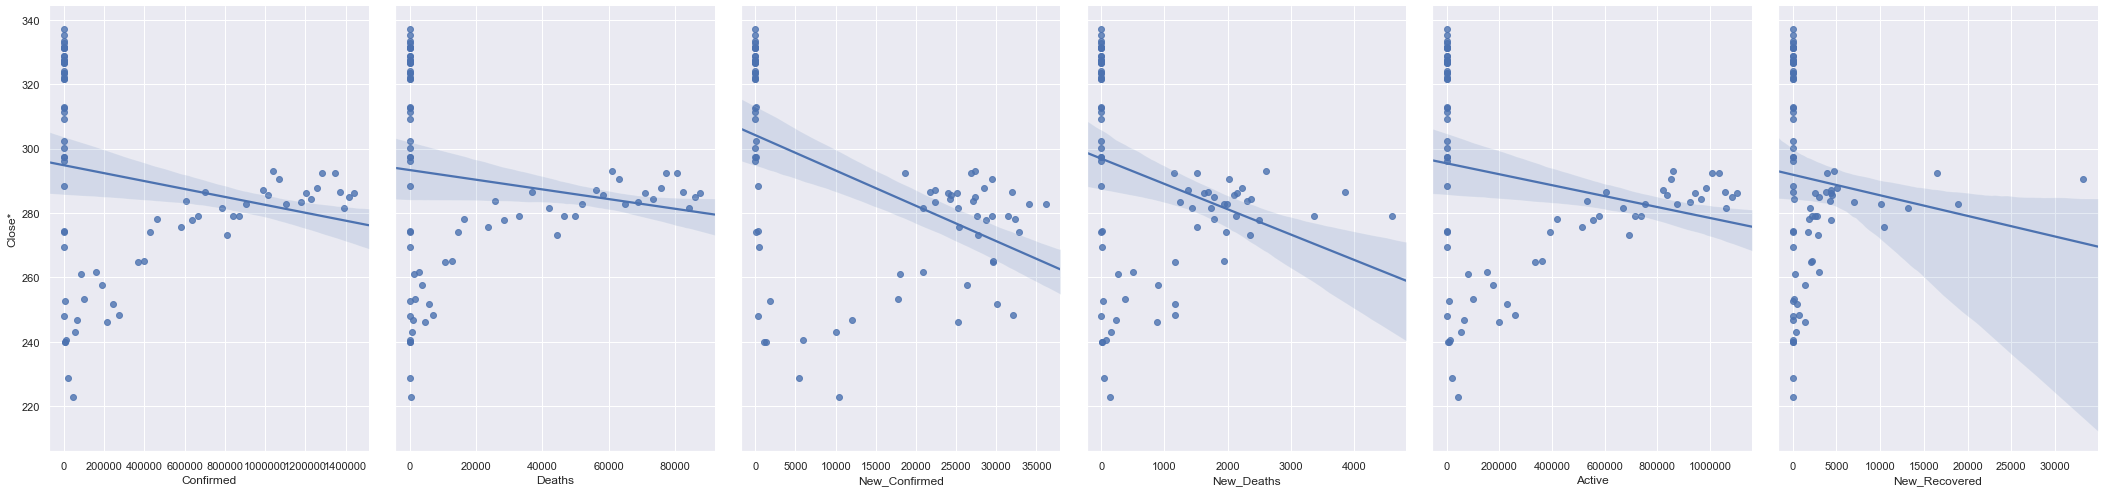

In [404]:
sns.pairplot(cvd19_us_spy_df,x_vars=['Confirmed','Deaths','New_Confirmed','New_Deaths','Active','New_Recovered'],y_vars=['Close*'], height =7,aspect=0.7,kind='reg')

<h1>Wow! as we can see it looks like the SPY price is negativley correlated with all the different aspects of the virus, and it is clear that new confirmed cases has greatest impact on the underlying price of the SPY ETF</h1>
<h3>Now lets see if the same is true for BTC</h3>

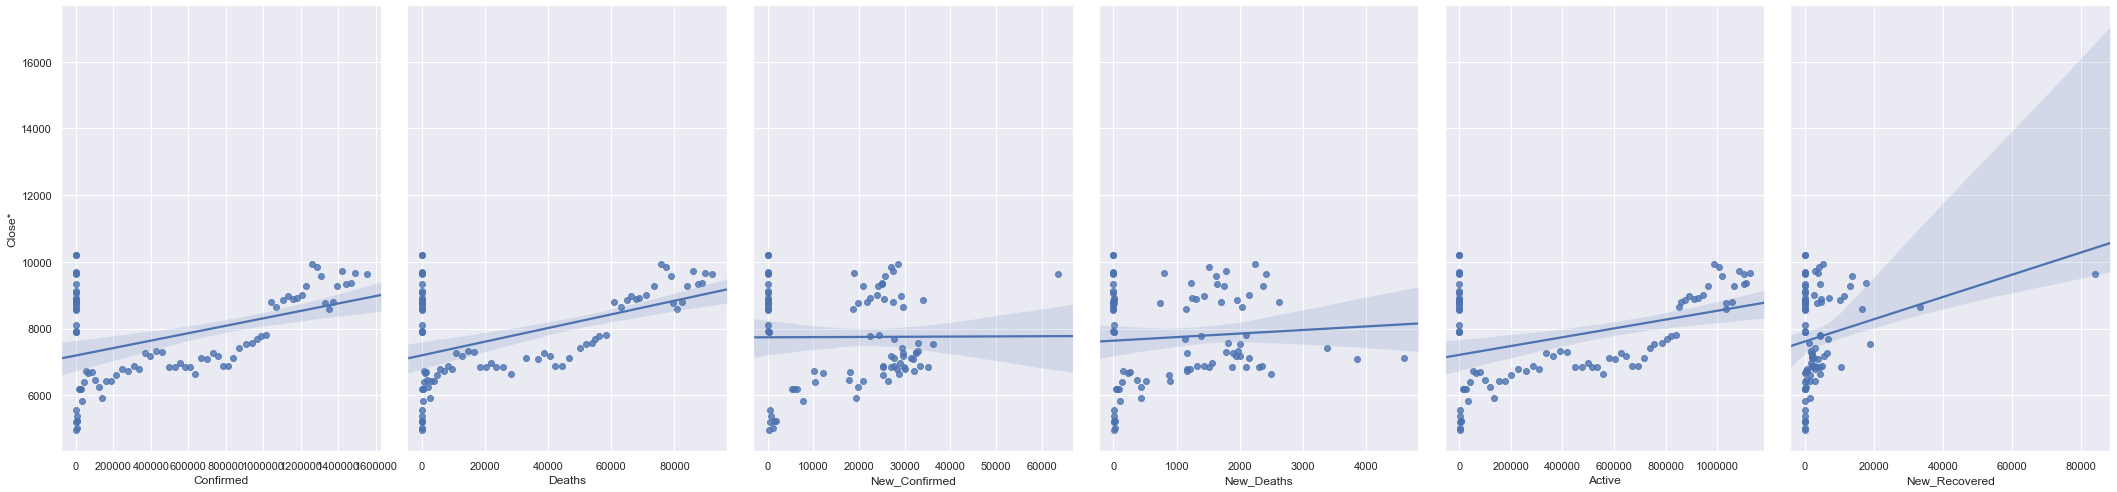

In [405]:
sns.pairplot(cvd19_us_btc_df,x_vars=['Confirmed','Deaths','New_Confirmed','New_Deaths','Active','New_Recovered'],y_vars=['Close*'], height =7,aspect=0.7,kind='reg')

<h1>Interesting! As we can see Bitcoin is positivley correlated with everything except the new confirmed cases. But this still makes it an attractive hedge against the SPY</h1> <h3><h2>What else is interesting is that it is doing much better against new recoveries, therefore we may assume that bitcoin will do better as the virus subsides as well!</h2><h3> Now lets see about GLD</h3>

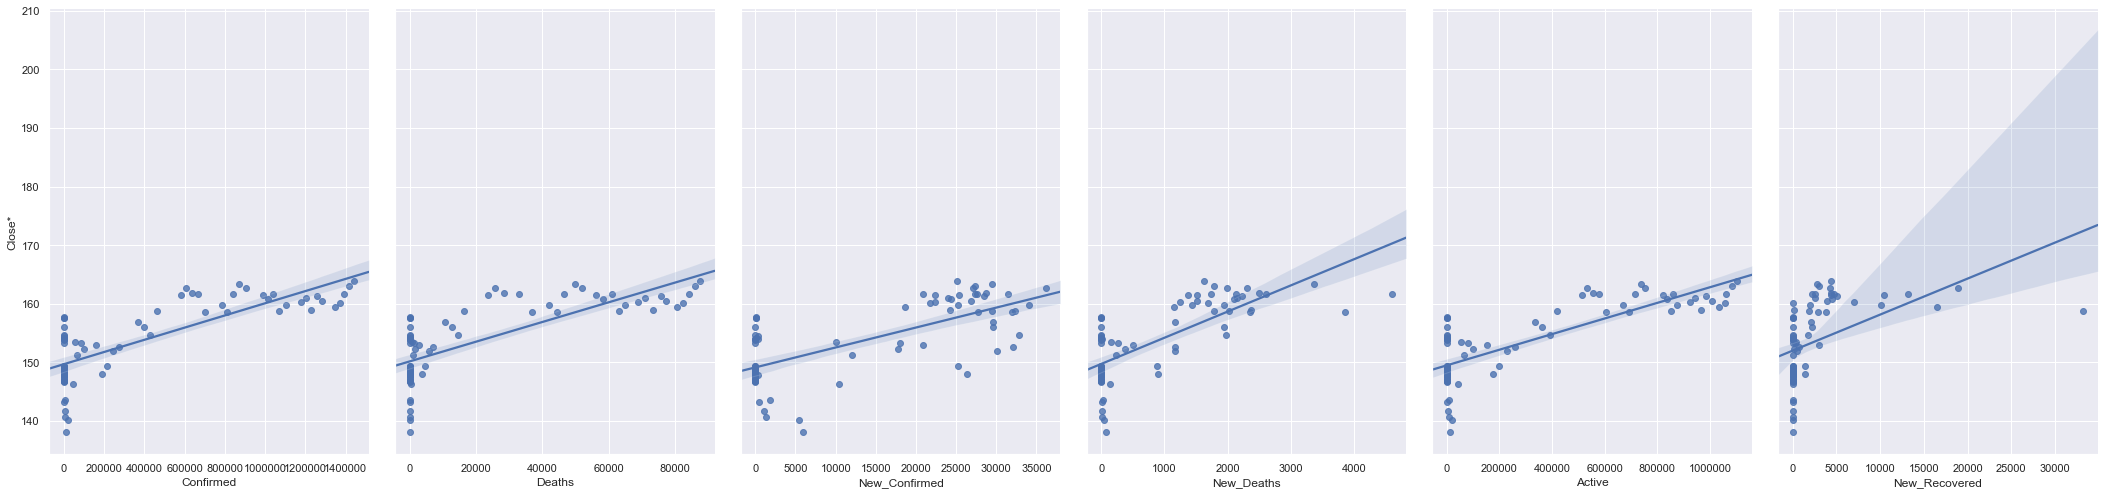

In [406]:
sns.pairplot(cvd19_us_gld_df,x_vars=['Confirmed','Deaths','New_Confirmed','New_Deaths','Active','New_Recovered'],y_vars=['Close*'], size =7,aspect=0.7,kind='reg')

<h3> The GLD data is very consistent with a positive correlation to covid-19 data in all aspects of the data, but the magnitude is lesser than that of BTC.</h3>

<h2>It looks like New_Deaths is having the greatest impact on all 3 of the financial instruments

<h1>Lets look at this data using scatter plots, and compare the trading volume as well as the closing price(Close*). <h1><h3>We'll start with SPY aginst CVD19<h3>

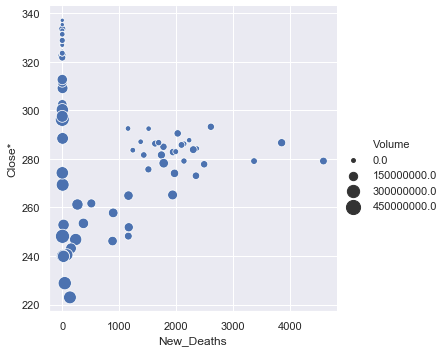

In [421]:
sns.relplot(x='New_Deaths',y='Close*',size="Volume",sizes=(15,200),data=cvd19_us_spy_df) 

<h3>What is shown here is that the higher the closing price of the SPY, the lower the trading volume is in regards to daily new covid-19 related deaths. This is something that can be seen as a negative signal</h3>

<h2>Lets make this same compairson with GLD</h2>

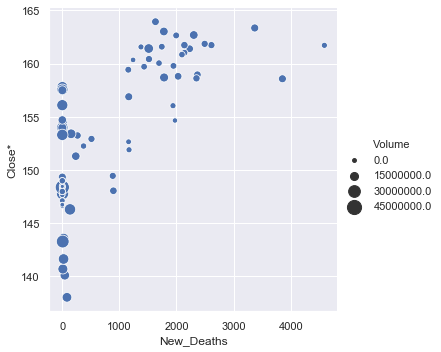

In [427]:
sns.relplot(x='New_Deaths',y='Close*',size="Volume", sizes=(15,200),data=cvd19_us_gld_df)

<h3>It seems that trading volume is greater at higher prices for gold, in regards to New_deaths, this can be seen as a positive signal for gold</h3>

<h2>Finally, lets have a look at BTC</h2>

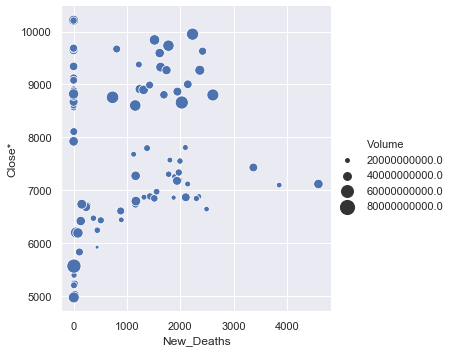

In [424]:
sns.relplot(x='New_Deaths',y='Close*',size="Volume",sizes=(15,200),data=cvd19_us_btc_df)


<h3>The volume for BTC is also greater at higher prices but volume seems to decrease at its most highest prices, so that can be signal that its over valued at its highest prices, but still positive sign in terms of price compared to new deaths</h3>